# About this project

## Credit card fraud is a growing concern in the financial sector, leading to substantial financial losses and security risks. This project focuses on detecting fraudulent transactions using machine learning techniques to enhance security and minimize fraudulent activities.

## Project Explanation

#### 1. What is Credit Card Fraud Detection?
##### Credit card fraud detection helps identify fraudulent transactions using machine learning.

#### 2. Why Use Machine Learning? 
##### Traditional rule-based methods fail to detect evolving fraud techniques.

##### Machine learning learns patterns and predicts fraud with higher accuracy.

#### 3. How Does This Project Work?
##### Loads transaction data.

##### Prepares and balances data for better accuracy.

##### Trains a Logistic Regression model to detect fraud.

##### Evaluates accuracy using test data.

##### Visualizes results for better understanding.

#### 4. What Did We Learn?
##### Fraudulent transactions are much fewer than legitimate ones.

##### Imbalanced data can mislead the model.

##### Machine learning helps detect fraud in real-time.

### 1. Importing Libraries



#####  NumPy & Pandas → For data handling and numerical computations.

#####  train_test_split → To split data into training and test sets.

#####  LogisticRegression → Machine learning model for fraud detection.

##### accuracy_score → To evaluate model performance.



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 2. Loading and Exploring the Dataset

#### Loads the dataset into a Pandas DataFrame.

In [3]:
fraud_detection = pd.read_csv('creditcard.csv')

#### Displays the first and last few records.

In [4]:
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_detection.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Checks for missing values.

In [6]:
fraud_detection.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Counts the number of fraud (1) and non-fraud (0) transactions.



In [7]:
fraud_detection['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 3. Splitting the Data into Fraudulent and Legitimate Transactions

#### Splits the dataset into two separate DataFrames.

#####  legit → Non-fraudulent transactions.

##### fraud → Fraudulent transactions.

In [8]:
legit = fraud_detection[fraud_detection.Class == 0]
fraud = fraud_detection[fraud_detection.Class == 1]

#### Displays the number of records in each category.



In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


### 4. Statistical Analysis

#### Summarizes transaction amounts for both classes.

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Computes the mean of all features grouped by transaction type.



In [12]:
fraud_detection.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### 5. Balancing the Dataset

##### The original dataset is imbalanced (more legitimate transactions than fraudulent ones).

##### We sample 492 legitimate transactions (same as fraud cases) to create a balanced dataset.


##### Merges the balanced data for better model performance.

In [13]:
legit_sample = legit.sample(n=492)
 

In [14]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [15]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262283,160396.0,-1.319125,0.786969,0.824547,-0.449334,-0.027541,-1.565659,0.933634,-0.385708,0.361141,...,-0.122295,-0.530629,0.283764,0.807238,-0.636792,0.051600,-0.771865,0.291271,1.98,0
199074,132796.0,-1.645271,1.626502,1.207925,2.873895,-0.330077,0.328809,-0.368182,0.990243,-1.170417,...,0.450746,0.886486,-0.137708,-0.040727,-0.383486,0.000354,-0.503884,0.076193,11.83,0
69320,53366.0,-0.843299,0.948830,1.528155,1.020372,-0.406633,0.106488,-0.251991,0.530632,0.055836,...,0.221781,0.701736,-0.239919,-0.108551,-0.015222,-0.163695,-0.063478,0.076896,1.55,0
162825,115403.0,2.120339,-0.610648,-1.570151,-0.443605,-0.138722,-0.532550,-0.188856,-0.126674,-0.591007,...,-0.415409,-0.664351,0.264029,0.635941,-0.017988,-0.423620,-0.014145,-0.058506,12.18,0
190485,128856.0,2.302357,-0.592765,-2.669126,-1.383126,0.777278,-0.364018,0.076396,-0.285246,-1.131470,...,0.324475,0.864855,-0.181879,-0.414112,0.565038,0.102589,-0.088900,-0.095817,18.95,0


### 6. Splitting Data into Features & Labels

#### X contains all features except the target column (Class).

In [18]:
X = new_dataset.drop(columns='Class',axis=1)
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
262283  160396.0 -1.319125  0.786969  0.824547 -0.449334 -0.027541 -1.565659   
199074  132796.0 -1.645271  1.626502  1.207925  2.873895 -0.330077  0.328809   
69320    53366.0 -0.843299  0.948830  1.528155  1.020372 -0.406633  0.106488   
162825  115403.0  2.120339 -0.610648 -1.570151 -0.443605 -0.138722 -0.532550   
190485  128856.0  2.302357 -0.592765 -2.669126 -1.383126  0.777278 -0.364018   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

#### Y contains the labels (fraud or non-fraud).

In [21]:
Y = new_dataset['Class']
print(Y)

262283    0
199074    0
69320     0
162825    0
190485    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### 7. Splitting into Training and Test Sets



#### Splits data into 80% training and 20% test.

#### Stratify=Y ensures equal distribution of fraud and non-fraud cases in both sets.

#### random_state=2 ensures consistent results.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


### 8. Training the Model

#### Initializes Logistic Regression as the classification model.

#### Trains it using the training dataset.

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

### 9. Evaluating Model Performance

#### Predicts fraud/non-fraud labels for training data.

#### Calculates training accuracy.

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.9377382465057179


#### Predicts fraud/non-fraud labels for test data.

#### Computes test accuracy.

In [28]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score on Test Data : ',test_data_accuracy)

Accuracy score on Test Data :  0.9137055837563451


### Visual Representation of the Project

#### 1. Fraud vs Legit Transactions Count

##### A bar plot showing how many fraud and non-fraud transactions exist.

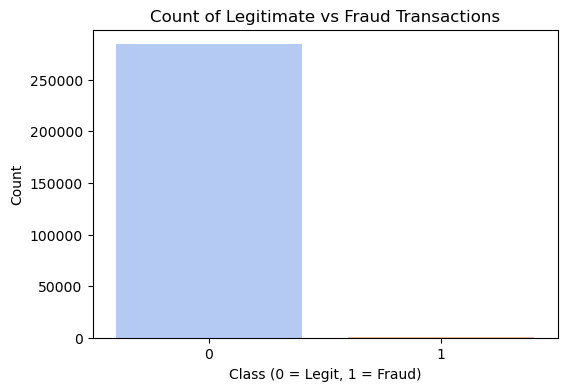

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=fraud_detection['Class'], palette='coolwarm')
plt.title('Count of Legitimate vs Fraud Transactions')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

#### 2. Fraudulent vs Legitimate Transaction Amounts

### Boxplot showing how transaction amounts differ between fraud and non-fraud cases

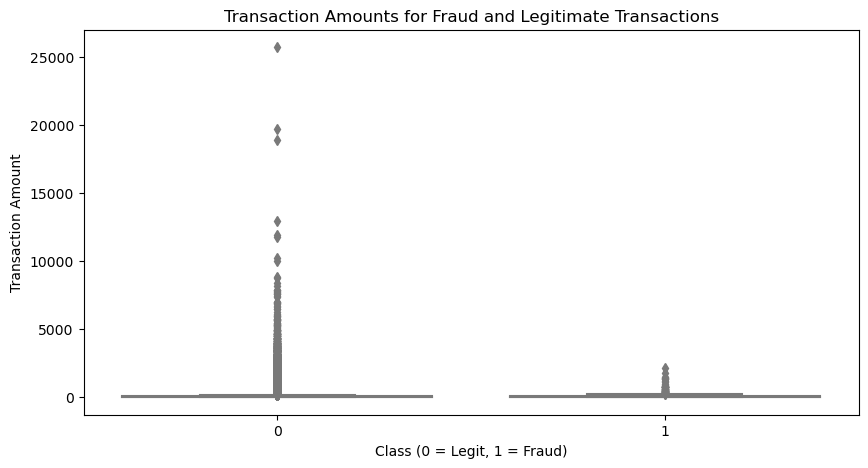

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x=fraud_detection['Class'], y=fraud_detection['Amount'], palette='coolwarm')
plt.title('Transaction Amounts for Fraud and Legitimate Transactions')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

#### 3. Model Performance (Training vs Test Accuracy)

#### Bar chart comparing training and test accuracy.

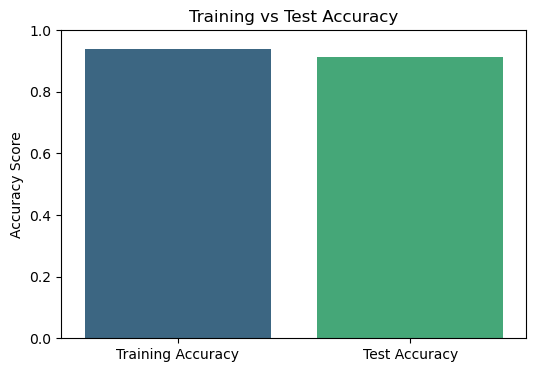

In [34]:
labels = ['Training Accuracy','Test Accuracy']
values = [training_data_accuracy,test_data_accuracy]

plt.figure(figsize=(6,4))
sns.barplot(x=labels,y=values,palette='viridis')
plt.ylim(0,1)
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy Score')
plt.show()